## Results: Fine-tuning training parameters

In [1]:
import sys
sys.path.append("C:/Users/matth/Documents/Martinos Center/mrtoct") 

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
import utils.test_utils as utils
import os
import pickle
import numpy as np
import gc
import pandas as pd

In [2]:
path_model = "C:/Users/matth/Documents/Martinos Center/Models/DeepBrain/"
path_dataset = "C:/Users/matth/Documents/Martinos Center/mrtoct/datasets/"

### Python commands

Run these lines in the command prompt to generate the dataset and train models.

##### Preprocessing:

* <font color = blue>python preprocessing.py --dataset ctmask_sqrt --mask_opt 1</font>
* <font color = blue>python preprocessing.py --dataset ctmask_nosqrt --mask_opt 1 --no_sqrt</font>

##### Training: 

* <font color = blue>python train.py --dataset ctmask_sqrt --name ctmask_sqrt --tanh --n_epochs 30</font>
* <font color = blue>python train.py --dataset ctmask_nosqrt --name ctmask --tanh --n_epochs 30</font>


##### Retrieve data

##### Plot

##### Metrics

## 3.1.2 Square Root of Porosity

### Python commands

##### Retrieve data

In [3]:
model_names = ["ctmask", "ctmask_sqrt"]
models, outputs = utils.retrieve_models(model_names, path_model)
trains, vals, bevels, begens, begts = utils.retrieve_history(outputs)

##### Plot

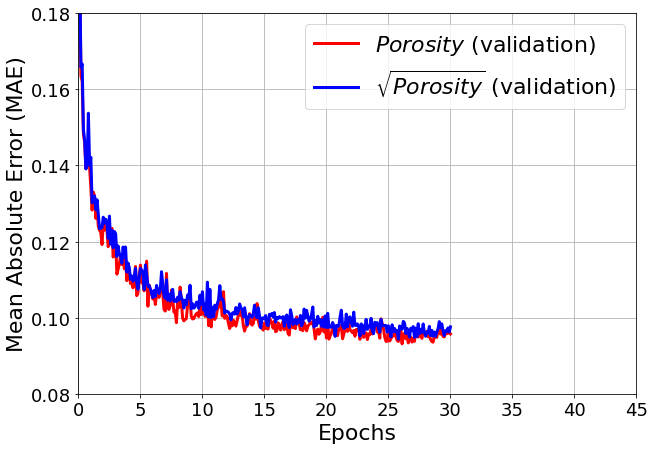

In [4]:
fig, ax = plt.subplots(figsize = (10,7))
x = np.linspace(0, 30, len(trains[0]))

ax.plot(x, [val for val in vals[0]], 'r', label = '$Porosity$ (validation)', linewidth = 3)
ax.plot(x, vals[1], 'b', label = '$\sqrt{Porosity}$ (validation)', linewidth = 3)
ax.set_xlabel("Epochs", fontsize = 22)
ax.set_ylabel("Mean Absolute Error (MAE)", fontsize = 22)

ax.tick_params(axis='both', which='major', labelsize=18)
ax.set_ylim([0.08, 0.180])
ax.set_xlim([0, 45])
ax.legend(fontsize = 22, loc = 'upper right')
ax.grid('on')

In [5]:
xx = [val*2 for val in vals[0]]
print(np.min(xx))
print(np.min(vals[1]))

0.18627128158634726
0.0943692719392044


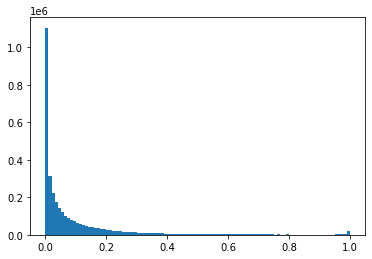

In [6]:
maes = np.array(np.abs(bevels[0]))
_ = plt.hist(maes, bins = 100)

##### Metrics

In [7]:
dataset_1 = np.load(path_dataset + "ctmask_nosqrt" + "/valid_eval.npz")
dataset_2 = np.load(path_dataset + "ctmask_sqrt" + "/valid_eval.npz")
datasets = [dataset_1, dataset_2]

metrics = utils.compute_val_metrics(models, model_names, datasets, bevels, begens, begts)
metrics

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:09<00:00, 64.52s/it]


,MAE,$\sigma_{MAE}$,MSE,$\sigma_{MSE}$,PSNR,$\sigma_{PSNR}$,SSIM,$\sigma_{SSIM}$
,,,,,,,,
ctmask,0.0931,0.0279,0.0345,0.0017,33.6613,5.8422,0.9655,0.0131
ctmask_sqrt,0.0944,0.0258,0.0336,0.0013,33.9403,5.3896,0.9665,0.0114


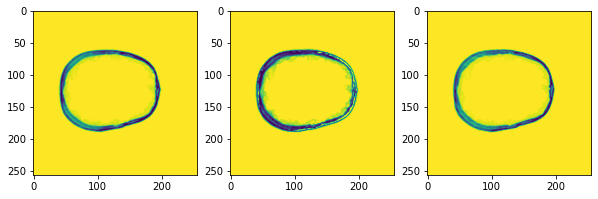

In [8]:
fig, ax = plt.subplots(1,3, figsize = (10,10))

source = dataset_1["x"][0:1]
target = dataset_1["y"][0:1]
mask = dataset_1["m"][0:1]
pred1 = models[0].predict(source)
pred2 = models[1].predict(source) ** 2

ax[0].imshow( (pred1[0,:,:,0] - 1) * mask[0,:,:,0] + 1)
ax[1].imshow( (pred2[0,:,:,0] - 1) * mask[0,:,:,0] + 1)
ax[2].imshow(target[0,:,:,0])

In [9]:
print((np.abs(pred1 - target)).flatten().mean())
print((np.abs(pred2 - target)).flatten().mean())

0.5286893755805215
0.3577348126786235


## 3.1.3 Data augmentation